In [8]:
# Step 0: Suppress warnings (optional)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
print("Warnings are suppressed.")


Warnings are suppressed.


In [1]:
# Step 1: Import necessary libraries

import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("All libraries imported successfully!")


All libraries imported successfully!


In [6]:
# Step 2: Set the dataset path

DATA_PATH = r"C:\Users\LENOVO\Downloads\archive (3)\Data\genres_original"



In [3]:
# Step 3: Define function to extract MFCC features from audio files

def extract_mfcc(file_path, max_pad_len=174):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfcc.shape[1]
        if pad_width > 0:
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]
        return mfcc
    except Exception as e:
        print("Error processing file:", file_path)
        print(e)
        return None

print("MFCC extraction function is ready.")


MFCC extraction function is ready.


In [9]:
# Step 4: Load audio data and extract features and labels

features = []
labels = []

for genre in os.listdir(DATA_PATH):
    genre_path = os.path.join(DATA_PATH, genre)
    if os.path.isdir(genre_path):
        print(f"Processing genre: {genre}")
        files = os.listdir(genre_path)
        print(f"Number of files in '{genre}': {len(files)}")
        for file in files:
            if file.endswith(".wav"):
                print(f"Loading file: {file}")
                file_path = os.path.join(genre_path, file)
                mfcc = extract_mfcc(file_path)
                if mfcc is not None:
                    features.append(mfcc)
                    labels.append(genre)

print(f"Total samples loaded: {len(features)}")

if len(labels) > 0:
    print(f"Example label: {labels[0]}")
else:
    print("No audio files loaded!")


Processing genre: blues
Number of files in 'blues': 100
Loading file: blues.00000.wav
Loading file: blues.00001.wav
Loading file: blues.00002.wav
Loading file: blues.00003.wav
Loading file: blues.00004.wav
Loading file: blues.00005.wav
Loading file: blues.00006.wav
Loading file: blues.00007.wav
Loading file: blues.00008.wav
Loading file: blues.00009.wav
Loading file: blues.00010.wav
Loading file: blues.00011.wav
Loading file: blues.00012.wav
Loading file: blues.00013.wav
Loading file: blues.00014.wav
Loading file: blues.00015.wav
Loading file: blues.00016.wav
Loading file: blues.00017.wav
Loading file: blues.00018.wav
Loading file: blues.00019.wav
Loading file: blues.00020.wav
Loading file: blues.00021.wav
Loading file: blues.00022.wav
Loading file: blues.00023.wav
Loading file: blues.00024.wav
Loading file: blues.00025.wav
Loading file: blues.00026.wav
Loading file: blues.00027.wav
Loading file: blues.00028.wav
Loading file: blues.00029.wav
Loading file: blues.00030.wav
Loading file: 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14580\770552988.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Loading file: jazz.00058.wav
Loading file: jazz.00059.wav
Loading file: jazz.00060.wav
Loading file: jazz.00061.wav
Loading file: jazz.00062.wav
Loading file: jazz.00063.wav
Loading file: jazz.00064.wav
Loading file: jazz.00065.wav
Loading file: jazz.00066.wav
Loading file: jazz.00067.wav
Loading file: jazz.00068.wav
Loading file: jazz.00069.wav
Loading file: jazz.00070.wav
Loading file: jazz.00071.wav
Loading file: jazz.00072.wav
Loading file: jazz.00073.wav
Loading file: jazz.00074.wav
Loading file: jazz.00075.wav
Loading file: jazz.00076.wav
Loading file: jazz.00077.wav
Loading file: jazz.00078.wav
Loading file: jazz.00079.wav
Loading file: jazz.00080.wav
Loading file: jazz.00081.wav
Loading file: jazz.00082.wav
Loading file: jazz.00083.wav
Loading file: jazz.00084.wav
Loading file: jazz.00085.wav
Loading file: jazz.00086.wav
Loading file: jazz.00087.wav
Loading file: jazz.00088.wav
Loading file: jazz.00089.wav
Loading file: jazz.00090.wav
Loading file: jazz.00091.wav
Loading file: 

In [10]:
# Step 5: Prepare data for training

X = np.array(features)
y = np.array(labels)

# Add channel dimension for CNN input
X = X[..., np.newaxis]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Input feature shape: {X_train.shape[1:]}")
print(f"Number of classes: {y_categorical.shape[1]}")


Training samples: 799
Test samples: 200
Input feature shape: (40, 174, 1)
Number of classes: 10


In [12]:
# Step 6: Build and compile the CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 174, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model built and compiled.")
model.summary()




Model built and compiled.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 38, 172, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 86, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 17, 84, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 42, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 21504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,752,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,772,746 (10.58 MB)

 Trainable params: 2,772,746 (10.58 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Step 7: Train the model

history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.1652 - loss: 10.7350 - val_accuracy: 0.1650 - val_loss: 2.2265
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.2340 - loss: 2.0741 - val_accuracy: 0.2100 - val_loss: 2.0864
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.3467 - loss: 1.8587 - val_accuracy: 0.2700 - val_loss: 1.9662
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.4643 - loss: 1.6445 - val_accuracy: 0.2900 - val_loss: 1.9580
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.5657 - loss: 1.2803 - val_accuracy: 0.3500 - val_loss: 1.9188
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6558 - loss: 1.0240 - val_accuracy: 0.3400 - val_loss: 2.0105
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.7384 - loss: 0.8174 - val_accuracy: 0.3700 - val_loss: 2.1011
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.7997 - loss: 0.6294 - val_accuracy: 0.3250 -

In [14]:
# Step 8: Evaluate the model on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3850 - loss: 3.3479
Test Loss: 3.3479480743408203
Test Accuracy: 0.38499999046325684


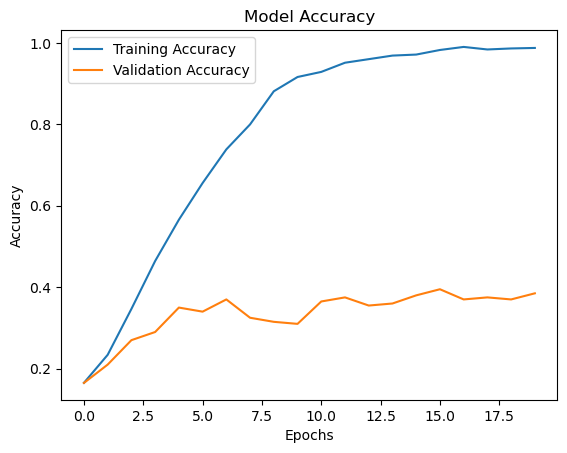

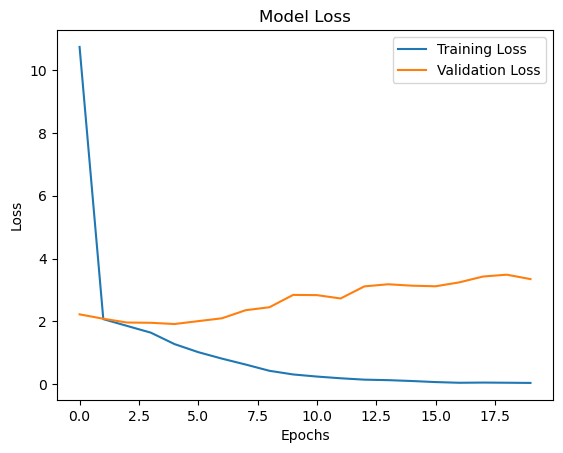

In [15]:
# Step 9: Plot training and validation accuracy and loss

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
